<a href="https://colab.research.google.com/github/imtiazahmadtanvir/machine_learning/blob/main/logestic_regration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

Step 2: Create Dataset

In [4]:
# Create dataset with 10 samples and 2 features
X, y = make_classification(
    n_samples=10,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=1
)

print("X:\n", X)
print("y:\n", y)


X:
 [[-0.64185521  0.78535215]
 [ 0.10972634  1.83671408]
 [-1.07362634  2.591487  ]
 [-1.38222372  0.85340843]
 [ 1.78689446  2.3841826 ]
 [ 0.94785273  3.53015683]
 [ 1.08876018  1.35925144]
 [ 0.42774158  3.54015499]
 [-0.88398194 -0.57876171]
 [-1.59347411  1.2168913 ]]
y:
 [1 0 1 1 0 0 0 0 1 1]


Step 3: Plot Dataset

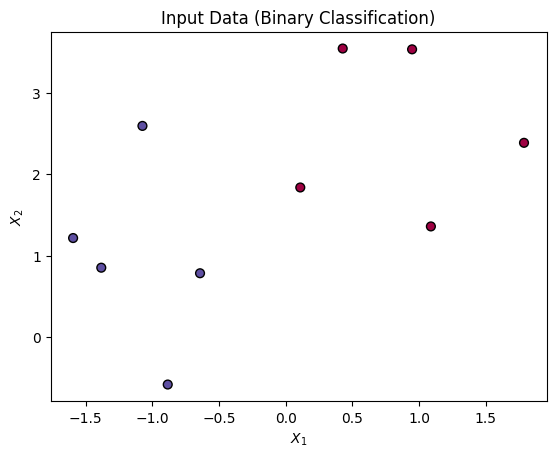

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Input Data (Binary Classification)")
plt.show()


Step 4: Define Helper Functions

In [6]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

Step 5: Initialize Model

In [7]:
XX = add_intercept(X)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

print("XX:\n", XX)
print("Initial theta:", theta)
print("Initial hypothesis h:\n", h)


XX:
 [[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]
Initial theta: [0. 0. 0.]
Initial hypothesis h:
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


Step 6: Compute Initial Cost

In [8]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print("Initial cost:", cost)

Initial cost: 0.6931471805599453


Step 7: One Step of Gradient Descent

In [9]:
m = y.size
alpha = 0.01

gradient = np.dot(XX.T, (h - y)) / m
theta -= alpha * gradient

print("Gradient:\n", gradient)
print("Updated theta:\n", theta)


Gradient:
 [0.         0.49680683 0.38910414]
Updated theta:
 [ 0.         -0.00496807 -0.00389104]


Step 8: Train with Gradient Descent

In [10]:
num_iter = 100000
cost_list = []

for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    cost_list.append(cost)

    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient

    if i % 10000 == 0:
        print(f"Cost at iteration {i}: {cost:.6f}")

print("Final theta:", theta)


Cost at iteration 0: 0.689180
Cost at iteration 10000: 0.029019
Cost at iteration 20000: 0.016868
Cost at iteration 30000: 0.011988
Cost at iteration 40000: 0.009316
Cost at iteration 50000: 0.007623
Cost at iteration 60000: 0.006453
Cost at iteration 70000: 0.005595
Cost at iteration 80000: 0.004939
Cost at iteration 90000: 0.004420
Final theta: [ 0.66203066 -8.49512412 -1.97751376]


Step 9: Plot Loss Curve

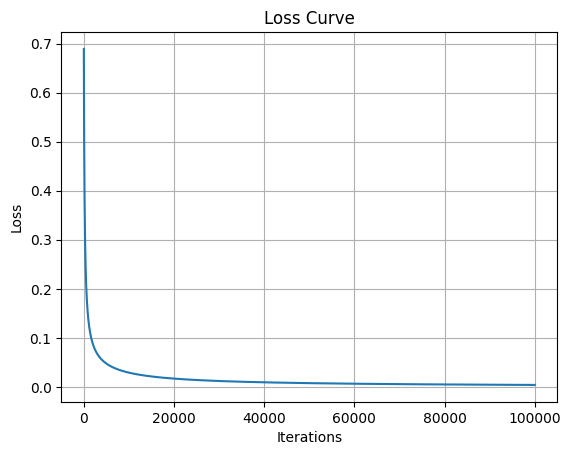

In [11]:
plt.plot(range(num_iter), cost_list)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Step 10: Predict and Evaluate

In [12]:
preds_prob = calc_h(XX, theta)
preds = preds_prob.round()

print("Predicted probabilities:\n", preds_prob)
print("Predicted classes:\n", preds)


Predicted probabilities:
 [9.89662906e-01 1.97968770e-02 9.90602955e-01 9.99977826e-01
 4.43999108e-09 5.73774026e-07 1.26852162e-05 4.66685994e-05
 9.99910042e-01 9.99992438e-01]
Predicted classes:
 [1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


In [13]:
accuracy = (preds == y).mean()
print(f"Training Accuracy (NumPy): {accuracy:.2f}")


Training Accuracy (NumPy): 1.00


Step 11: Predict New Point

In [14]:
new_x = np.array([1, -0.8, 0.8])  # intercept = 1, x1 = -0.8, x2 = 0.8
new_pred_prob = calc_h(new_x, theta)
print("Prediction for new sample:", new_pred_prob.round())


Prediction for new sample: 1.0


Step 12: Plot Decision Boundary

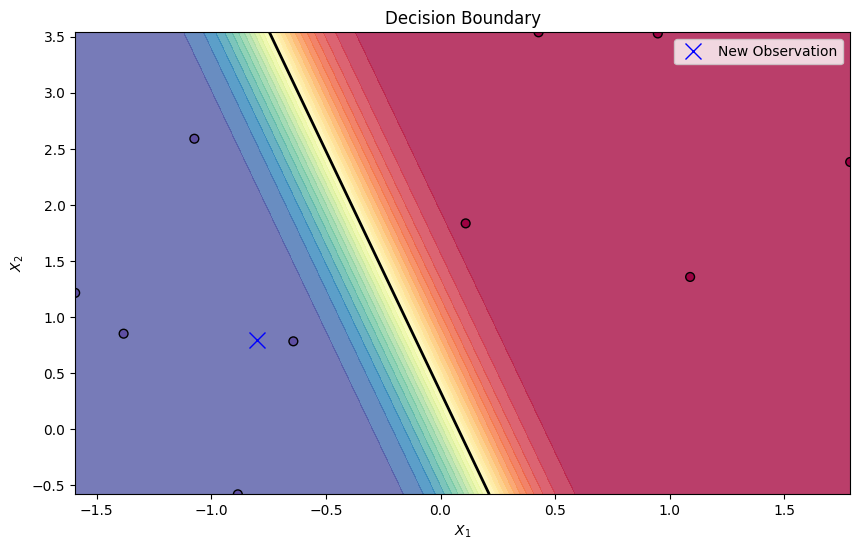

In [15]:
plt.figure(figsize=(10, 6))
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))

grid = np.c_[xx1.ravel(), xx2.ravel()]
grid_with_intercept = add_intercept(grid)
probs = calc_h(grid_with_intercept, theta).reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, levels=25, cmap=plt.cm.Spectral, alpha=0.8)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black')
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.plot(-0.8, 0.8, 'bx', markersize=12, label="New Observation")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Decision Boundary")
plt.legend()
plt.show()


Step 13: Compare with Scikit-learn

In [16]:
model = LogisticRegression(C=1e20, solver='lbfgs')
model.fit(X, y)

preds_sklearn = model.predict(X)
score_sklearn = (preds_sklearn == y).mean()

print(f"Training Accuracy (scikit-learn): {score_sklearn}")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Training Accuracy (scikit-learn): 1.0
Intercept: [0.27561212]
Coefficients: [[-14.70501451  -3.00497196]]


**Final comparison printout**

In [18]:
# Final comparison printout
print(f"\n{'Model':<25} {'Accuracy'}")
print(f"{'From Scratch (NumPy)':<25} {accuracy:.2f}")
print(f"{'Scikit-learn':<25} {score_sklearn:.2f}")


Model                     Accuracy
From Scratch (NumPy)      1.00
Scikit-learn              1.00
